<a href="https://colab.research.google.com/github/Ry02024/SignateCup2024Summer_Ry03/blob/main/CompeCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 著作権とライセンス
## クレジットとライセンスに関する注意

このノートブックの一部は、Yutak6116さん がGitHubに公開した著作物を基にしています。しかし、元の著作物にはライセンス情報が記載されていません。

- **元の著作物**: Yutak6116, "SignateCup2024Summer", https://github.com/Yutak6116/SignateCup2024Summer.git

私はこの著作物を元にノートブックを作成しましたが、元の著作物の利用に関しては、著作者の許可を得ることを推奨します。

- **著者**: Ryo Tanohata
- **ライセンス**: [Creative Commons BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/)

このノートブックは作成途中ですが、Ryo Tanohata によって作成されています。完成時には Creative Commons BY-NC-SA 4.0 ライセンスの下で提供されます。

現在の内容は途中経過であり、引き続き改良が行われる予定です。利用の際は著者のクレジットを表示し、非営利目的でのみ利用してください。また、改変した場合は同じライセンスの下で配布してください。


In [ ]:
!pip install japanize-matplotlib -q
!pip install catboost -q
import japanize_matplotlib
import pandas as pd
from catboost import CatBoostClassifier, Pool
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## データの読み込み

In [ ]:
data_dir = "/content/drive/MyDrive/0.Working/active/signate/旅行パッケージの成約率予測/"
train = pd.read_csv(data_dir + "train.csv")
test = pd.read_csv(data_dir + "test.csv")

In [ ]:
train_x = train.drop(['id', 'ProdTaken'], axis=1)
train_y = train['ProdTaken']
test_x = test.drop(['id'], axis=1)

## 2変量分析

In [ ]:
!git clone https://github.com/Ry02024/SignateCup2024Summer_Ry03.git

Cloning into 'SignateCup2024Summer_Ry03'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 302.72 KiB | 3.83 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [ ]:
from SignateCup2024Summer_Ry03.src import preprocessing
from SignateCup2024Summer_Ry03.src import visualization
from SignateCup2024Summer_Ry03.src import model_optimization

In [ ]:
train_DurationOfPitch = train_x['DurationOfPitch'].apply(preprocessing.convert_to_minutes)

In [ ]:
train_DurationOfPitch.head()

,DurationOfPitch
0,15.0
1,14.0
2,10.0
3,18.0
4,17.0


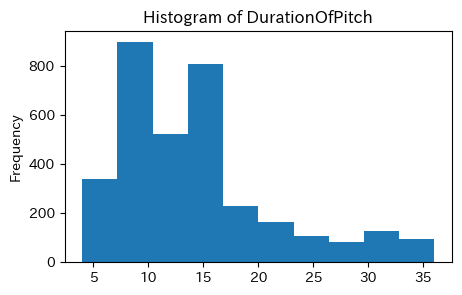

In [ ]:
visualization.HistChart(train_DurationOfPitch)

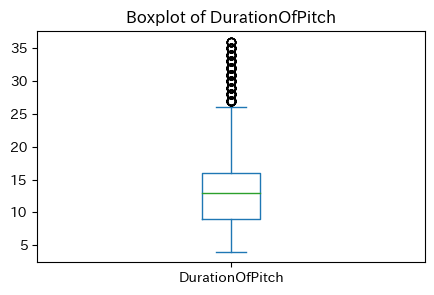

In [ ]:
visualization.BoxChart(train_DurationOfPitch)

- **傾向**: プレゼン時間が10-15分の範囲で最も成約率が高いが、30分以上のプレゼンは逆効果。
- **言えること**: 効果的なプレゼン時間は10-15分であり、それ以上の時間は効果が薄れる可能性があるため、プレゼンの最適化が必要です。

## 応用的な分析

### クラスタ分析

In [ ]:
data_dir = "/content/drive/MyDrive/0.Working/active/signate/旅行パッケージの成約率予測/"
train = pd.read_csv(data_dir + "train.csv")
test = pd.read_csv(data_dir + "test.csv")

In [ ]:
train_x = train.drop(['id', 'ProdTaken'], axis=1)
train_y = train['ProdTaken']
test_x = test.drop(['id'], axis=1)

In [ ]:
# データの結合
full_data = pd.concat([train_x, test_x], axis=0)

# 前処理
full_processed4cluster = preprocessing.preprocess_data4cluster(full_data)

In [ ]:
full_processed4cluster

,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome,...,ProductPitched_standard,ProductPitched_superdeluxe,Designation_executive,Designation_manager,Designation_seniormanager,Designation_vp,married_独身,married_結婚済み,married_離婚済み,car_possession_車なし
0,50.000000,2,15.0,1.0,4.0,3.0,5.0,1,4,253905.0,...,False,False,True,False,False,False,False,False,False,False
1,56.000000,1,14.0,1.0,4.0,3.0,2.0,1,4,404475.0,...,True,False,False,False,True,False,False,False,True,True
2,39.309654,1,10.0,1.0,3.0,3.0,4.0,0,4,278145.0,...,False,False,True,False,False,False,False,True,False,False
3,37.000000,2,18.0,1.0,3.0,4.0,1.0,0,5,326805.0,...,True,False,False,False,True,False,False,False,True,True
4,48.000000,3,17.0,1.0,3.0,4.0,4.0,0,4,258435.0,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,41.000000,1,14.0,1.0,3.0,3.0,2.0,0,4,261840.0,...,False,False,True,False,False,False,False,True,False,False
3485,44.000000,1,35.0,3.0,5.0,3.0,3.0,0,3,349770.0,...,False,False,False,True,False,False,False,True,False,True
3486,24.000000,2,21.0,2.0,3.0,3.0,2.0,0,3,270000.0,...,False,False,True,False,False,False,True,False,False,False
3487,25.000000,1,9.0,2.0,3.0,3.0,2.0,0,3,272430.0,...,False,False,True,False,False,False,False,True,False,False


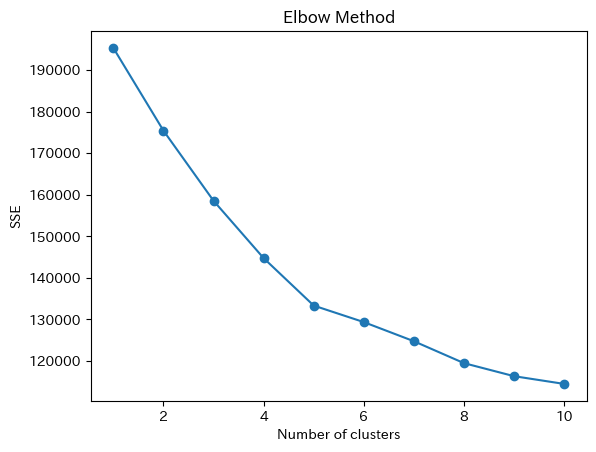

In [ ]:
# 数値データの標準化
features_scaled = StandardScaler().fit_transform(full_processed4cluster)

# エルボー法でクラスタ数を決定
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# エルボー法のグラフをプロット
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# 最適なクラスタ数でKMeansクラスタリングを実行
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)  # n_init を明示的に設定
kmeans.fit(features_scaled)

# クラスタリング結果を追加
full_processed4cluster['Cluster'] = kmeans.labels_

# クラスタリング結果を確認
print(full_processed4cluster['Cluster'].value_counts())

Cluster
2    2325
1    2096
3    1624
0     641
4     292
Name: count, dtype: int64


In [ ]:
full_processed4cluster.shape

(6978, 29)

In [ ]:
import pandas as pd

# クラスタごとのデータ数を確認
cluster_counts = full_processed4cluster['Cluster'].value_counts()
print("Cluster counts:\n", cluster_counts)

# 数値データのクラスタごとの平均値を計算
numeric_columns = full_processed4cluster.select_dtypes(include=['float64', 'int64']).columns
cluster_means = full_processed4cluster.groupby('Cluster')[numeric_columns].mean()
print("\nCluster means for numeric columns:\n")
display(cluster_means)

# カテゴリカルデータのクラスタごとのクロス集計を表示
categorical_columns = full_processed4cluster.select_dtypes(include=['object', 'category', 'bool']).columns
for column in categorical_columns:
    cluster_crosstab = pd.crosstab(full_processed4cluster['Cluster'], full_processed4cluster[column])
    print(f"\nCluster crosstab for {column}:\n")
    display(cluster_crosstab)

Cluster counts:
 Cluster
2    2325
1    2096
3    1624
0     641
4     292
Name: count, dtype: int64

Cluster means for numeric columns:



,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,MonthlyIncome,offspring,offspring_identified
Cluster,,,,,,,,,,,,
0,48.468502,1.631825,15.503795,2.271451,3.523163,3.594384,3.507360,0.107644,2.319813,465792.748378,0.893916,0.053042
1,38.649347,1.823950,17.329334,2.463740,3.679227,3.292462,3.316515,0.075382,2.550573,338868.424940,1.080630,0.002385
2,34.254109,1.524731,13.338860,2.399140,3.714146,3.378495,3.206808,0.103226,2.605161,300937.081376,0.956129,0.002581
3,42.284673,1.810345,12.319581,2.355296,3.649015,3.647167,2.864427,0.116995,2.323276,390070.495690,0.975369,0.000000
4,47.651745,1.500000,12.556392,2.506849,3.777397,3.414384,3.674569,0.113014,2.845890,490042.825342,1.027397,0.099315



Cluster crosstab for TypeofContact_Self Enquiry:



TypeofContact_Self Enquiry,False,True
Cluster,,
0,222,419
1,752,1344
2,834,1491
3,663,961
4,45,247



Cluster crosstab for Occupation_salaried:



Occupation_salaried,False,True
Cluster,,
0,333,308
1,1137,959
2,1777,548
3,797,827
4,133,159



Cluster crosstab for Occupation_smallbusiness:



Occupation_smallbusiness,False,True
Cluster,,
0,347,294
1,1061,1035
2,900,1425
3,1035,589
4,179,113



Cluster crosstab for Gender_MALE:



Gender_MALE,False,True
Cluster,,
0,201,440
1,873,1223
2,904,1421
3,731,893
4,51,241



Cluster crosstab for ProductPitched_deluxe:



ProductPitched_deluxe,False,True
Cluster,,
0,641,0
1,30,2066
2,2314,11
3,1614,10
4,288,4



Cluster crosstab for ProductPitched_king:



ProductPitched_king,False,True
Cluster,,
0,641,0
1,2096,0
2,2321,4
3,1623,1
4,11,281



Cluster crosstab for ProductPitched_standard:



ProductPitched_standard,False,True
Cluster,,
0,641,0
1,2089,7
2,2308,17
3,38,1586
4,288,4



Cluster crosstab for ProductPitched_superdeluxe:



ProductPitched_superdeluxe,False,True
Cluster,,
0,3,638
1,2096,0
2,2323,2
3,1624,0
4,292,0



Cluster crosstab for Designation_executive:



Designation_executive,False,True
Cluster,,
0,630,11
1,2095,1
2,13,2312
3,1623,1
4,287,5



Cluster crosstab for Designation_manager:



Designation_manager,False,True
Cluster,,
0,624,17
1,19,2077
2,2322,3
3,1606,18
4,290,2



Cluster crosstab for Designation_seniormanager:



Designation_seniormanager,False,True
Cluster,,
0,627,14
1,2085,11
2,2323,2
3,35,1589
4,276,16



Cluster crosstab for Designation_vp:



Designation_vp,False,True
Cluster,,
0,632,9
1,2096,0
2,2325,0
3,1622,2
4,39,253



Cluster crosstab for married_独身:



married_独身,False,True
Cluster,,
0,477,164
1,1858,238
2,1599,726
3,1486,138
4,249,43



Cluster crosstab for married_結婚済み:



married_結婚済み,False,True
Cluster,,
0,418,223
1,1216,880
2,1506,819
3,900,724
4,92,200



Cluster crosstab for married_離婚済み:



married_離婚済み,False,True
Cluster,,
0,412,229
1,1622,474
2,1688,637
3,1319,305
4,249,43



Cluster crosstab for car_possession_車なし:



car_possession_車なし,False,True
Cluster,,
0,199,442
1,1354,742
2,1252,1073
3,699,925
4,115,177




---

**Cluster 0: 高収入・管理職・VPクラスタ**  
特性: 年齢が高く、収入が最も高い。主にVPなどの高位職。男性が多く、superdeluxe 製品を好む。車なしの割合が高く、独身率や離婚済み率も高い。

---

**Cluster 1: 高収入・シニアマネージャークラスタ**  
特性: 年齢が高く、シニアマネージャーやsmall businessに従事する人が多い。deluxe 製品を選ぶ傾向があり、車なしの割合が比較的高い。

---

**Cluster 2: 若年層・低収入・サラリーマンクラスタ**  
特性: 若年層で収入が低く、主にサラリーマン。standard 製品を選択する傾向が強い。車なし率が高いが、全体的に収入は低め。

---

**Cluster 3: 中間層・サラリーマン・スタンダードクラスタ**  
特性: 年齢と収入が中間層。standard 製品を好み、サラリーマンが多い。車なしの割合もやや高く、結婚済みの割合が比較的高い。

---

**Cluster 4: 中間層・小規模ビジネス・車なしクラスタ**  
特性: 年齢がやや高く、小規模ビジネスに従事する人が多い。king 製品を好む。車なしの割合が最も高く、vp職の割合も他のクラスタより高い。

---

# 機械学習のPDCA：予測モデルの生成

## CatBoost+missing

In [ ]:
#numpy, matplotlib, pandasのインポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import unicodedata

#lightGBMのインポート
import lightgbm as lgb

#訓練データとテストデータ分割のためにインポート
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold

#標準化のためインポート
from sklearn.preprocessing import StandardScaler

#エンコーディングのためインポート
from sklearn.preprocessing import LabelEncoder

#精度検証のためインポート
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

#ハイパーパラメータチューニングのためにインポート

#特徴量選択のためにインポート
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
data_dir = "/content/drive/MyDrive/0.Working/active/signate/旅行パッケージの成約率予測/"

In [ ]:
# 自分のドライブにマウントしているとドライブ上のファイルを読み込むことができます。
# ファイルの場所がわからない場合、左のタブから目的のファイルを探し、「パスをコピー」しペーストすることで読み込めます。
train = pd.read_csv(data_dir + "train.csv")
test = pd.read_csv(data_dir + "test.csv")

In [ ]:
train_x = train.drop(['id', 'ProdTaken'], axis=1)
train_y = train['ProdTaken']
test_x = test.drop(['id'], axis=1)

In [ ]:
!pip install catboost -q
import pandas as pd
from catboost import CatBoostClassifier, Pool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.3 MB/s eta 0:00:00


## 前処理関数

In [ ]:
!git clone https://github.com/Ry02024/SignateCup2024Summer_Ry03.git

Cloning into 'SignateCup2024Summer_Ry03'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 295.65 KiB | 6.03 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
from SignateCup2024Summer_Ry03.src import preprocessing

In [ ]:
!pip install japanize-matplotlib -q
import japanize_matplotlib

## 前処理の実行

In [ ]:
# データの結合
full_data = pd.concat([train_x, test_x], axis=0)
full_data['Cluster'] = full_processed4cluster['Cluster']

# 前処理関数
full_processed, categorical_columns = preprocessing.preprocess_data_for_catboost(full_data)

# # Cluster列をカテゴリカル変数として追加
full_processed['Cluster'] = full_processed['Cluster'].astype(str)  # カテゴリカル変数として扱うために文字列に変換
categorical_columns.append('Cluster')  # categorical_columnsリストに追加

# カテゴリカルフィーチャーのNaNを最頻値で埋める
for col in categorical_columns:
    mode_value = full_processed[col].mode()[0]
    full_processed[col] = full_processed[col].fillna(mode_value)

    # 数値をカテゴリカルフィーチャーとして扱うために文字列に変換
    full_processed[col] = full_processed[col].astype(str)

# トレーニングデータとテストデータに再分割
train_x_processed = full_processed[:len(train_x)]
test_x_processed = full_processed[len(train_x):]

# トレーニングデータ用のターゲットを再取得
train_y_processed = train_y

In [ ]:
full_processed

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,Cluster,married,car_possession,offspring,offspring_identified
0,50.0,Self Enquiry,2,15.0,largebusiness,MALE,1.0,4.0,basic,3.0,5.0,1,4,executive,253905.0,2,未婚,車あり,0,0
1,56.0,Company Invited,1,14.0,salaried,MALE,1.0,4.0,standard,3.0,2.0,1,4,seniormanager,404475.0,3,離婚済み,車なし,0,0
2,NaN,Self Enquiry,1,10.0,largebusiness,FEMALE,1.0,3.0,basic,3.0,4.0,0,4,executive,278145.0,2,結婚済み,車あり,0,0
3,37.0,Self Enquiry,2,18.0,smallbusiness,FEMALE,1.0,3.0,standard,4.0,1.0,0,5,seniormanager,326805.0,3,離婚済み,車なし,0,0
4,48.0,Company Invited,3,17.0,smallbusiness,FEMALE,1.0,3.0,basic,4.0,4.0,0,4,executive,258435.0,2,独身,車なし,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,41.0,Company Invited,1,14.0,smallbusiness,FEMALE,1.0,3.0,basic,3.0,2.0,0,4,executive,261840.0,2,結婚済み,車あり,0,0
3485,44.0,Company Invited,1,35.0,salaried,MALE,3.0,5.0,deluxe,3.0,3.0,0,3,manager,349770.0,1,結婚済み,車なし,1,0
3486,24.0,Self Enquiry,2,21.0,smallbusiness,MALE,2.0,3.0,basic,3.0,2.0,0,3,executive,270000.0,2,独身,車あり,0,0
3487,25.0,Self Enquiry,1,9.0,smallbusiness,MALE,2.0,3.0,basic,3.0,2.0,0,3,executive,272430.0,2,結婚済み,車あり,1,0


## kfold2：5つのモデルの平均

**関数の定義**

In [ ]:
from catboost import Pool
from sklearn.model_selection import KFold

def create_kfold_data(train_x_processed, train_y_processed, categorical_columns, n_splits=5, random_state=42):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    kfold_data = []

    for train_index, valid_index in kf.split(train_x_processed):
        X_train, X_valid = train_x_processed.iloc[train_index], train_x_processed.iloc[valid_index]
        y_train, y_valid = train_y_processed.iloc[train_index], train_y_processed.iloc[valid_index]

        train_pool = Pool(X_train, label=y_train, cat_features=categorical_columns)
        valid_pool = Pool(X_valid, label=y_valid, cat_features=categorical_columns)

        kfold_data.append((train_pool, valid_pool))

    return kfold_data

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

def train_and_evaluate_models(kfold_data, n_iterations=1000, learning_rate=0.05, depth=6, random_seed=42):
    fold_scores = []
    models = []

    for train_pool, valid_pool in kfold_data:
        model = CatBoostClassifier(
            iterations=n_iterations,
            learning_rate=learning_rate,
            depth=depth,
            eval_metric='AUC',
            random_seed=random_seed,
            verbose=100
        )

        model.fit(
            train_pool,
            eval_set=valid_pool,
            early_stopping_rounds=100
        )

        y_valid_pred = model.predict_proba(valid_pool)[:, 1]
        auc_score = roc_auc_score(valid_pool.get_label(), y_valid_pred)
        fold_scores.append(auc_score)
        models.append(model)

        print(f"このフォールドのAUC: {auc_score:.4f}")

        # 検証結果を可視化
        plot_evaluation_curves(valid_pool.get_label(), y_valid_pred)

    print(f"全フォールドの平均AUC: {np.mean(fold_scores):.4f}")

    return models

def plot_evaluation_curves(y_true, y_pred):
    # ROC曲線のデータを取得
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='CatBoost Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

    # PR曲線のデータを取得
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    ap_score = average_precision_score(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'CatBoost Model (AP = {ap_score:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')

    # ランダム分類器のベースラインを追加
    no_skill = len(y_true[y_true == 1]) / len(y_true)
    plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.show()

In [ ]:
def predict_with_models(models, test_x_processed):
    predictions = np.zeros(len(test_x_processed))

    for model in models:
        predictions += model.predict_proba(test_x_processed)[:, 1]

    # 予測の平均化
    predictions /= len(models)

    return predictions

def save_predictions(predictions, file_name='submission_catboost_kfold_mean.csv'):
    # 提出用データフレームに予測結果を代入
    submit = pd.read_csv(data_dir + "sample_submit.csv", header=None)
    submit[1] = predictions

    # CSVファイルに書き出し
    submit.to_csv(file_name, index=False, header=False)

**処理の実行**

In [ ]:
# 1. 交差検証データの作成
kfold_data = create_kfold_data(train_x_processed, train_y_processed, categorical_columns, n_splits=4)

0:	test: 0.7279493	best: 0.7279493 (0)	total: 62.5ms	remaining: 1m 2s
100:	test: 0.8654843	best: 0.8662925 (67)	total: 1.05s	remaining: 9.35s
200:	test: 0.8672578	best: 0.8672803 (197)	total: 2.63s	remaining: 10.4s
300:	test: 0.8657425	best: 0.8679201 (205)	total: 4.75s	remaining: 11s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8679200808
bestIteration = 205

Shrink model to first 206 iterations.
このフォールドのAUC: 0.8679


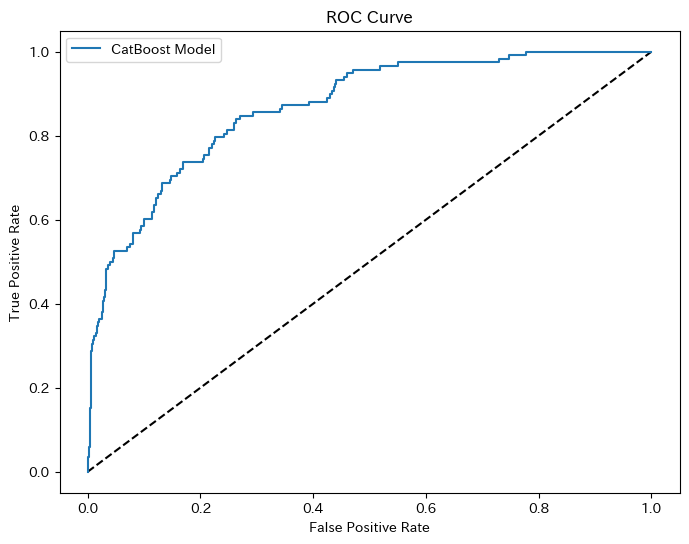

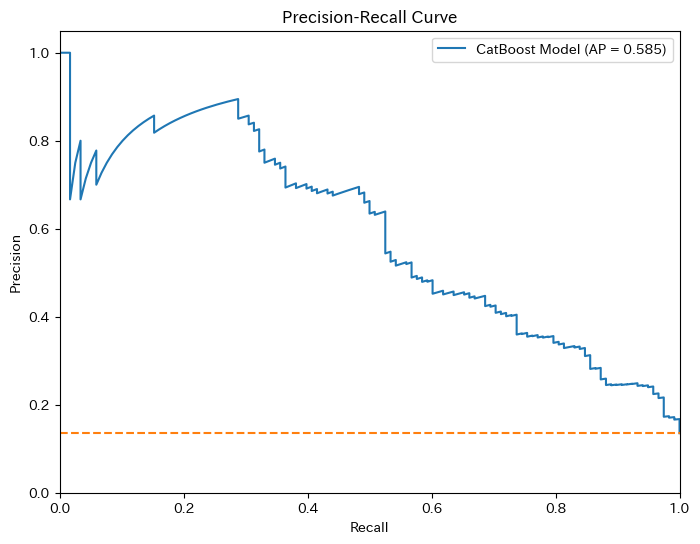

0:	test: 0.7096686	best: 0.7096686 (0)	total: 30.1ms	remaining: 30s
100:	test: 0.8190348	best: 0.8190839 (99)	total: 1.3s	remaining: 11.6s
200:	test: 0.8204383	best: 0.8223817 (181)	total: 2.32s	remaining: 9.24s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8223816581
bestIteration = 181

Shrink model to first 182 iterations.
このフォールドのAUC: 0.8224


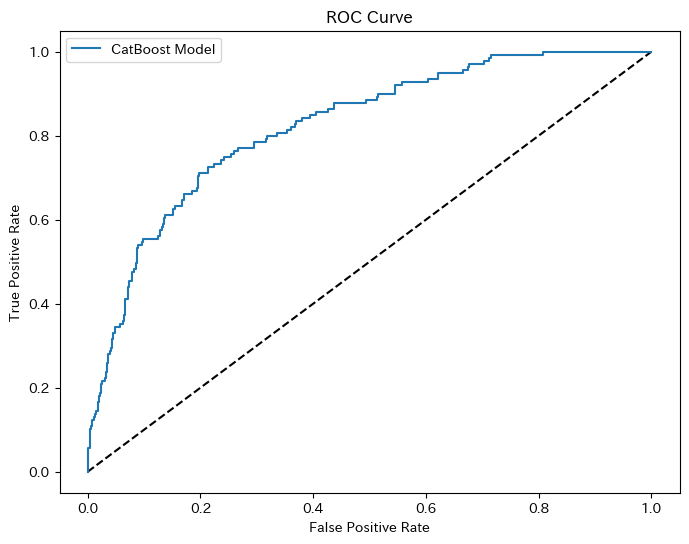

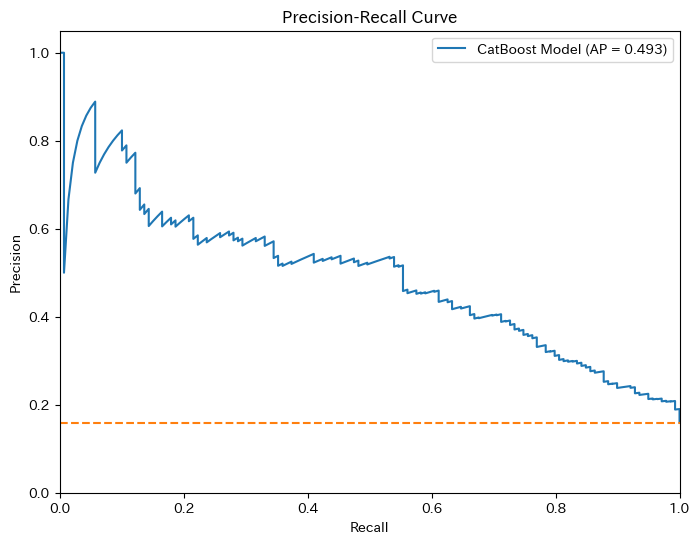

0:	test: 0.7625027	best: 0.7625027 (0)	total: 11.7ms	remaining: 11.6s
100:	test: 0.8311366	best: 0.8311585 (99)	total: 951ms	remaining: 8.47s
200:	test: 0.8332022	best: 0.8337705 (199)	total: 1.88s	remaining: 7.46s
300:	test: 0.8329180	best: 0.8345464 (273)	total: 2.89s	remaining: 6.71s
400:	test: 0.8329399	best: 0.8347213 (383)	total: 3.91s	remaining: 5.84s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8347213115
bestIteration = 383

Shrink model to first 384 iterations.
このフォールドのAUC: 0.8347


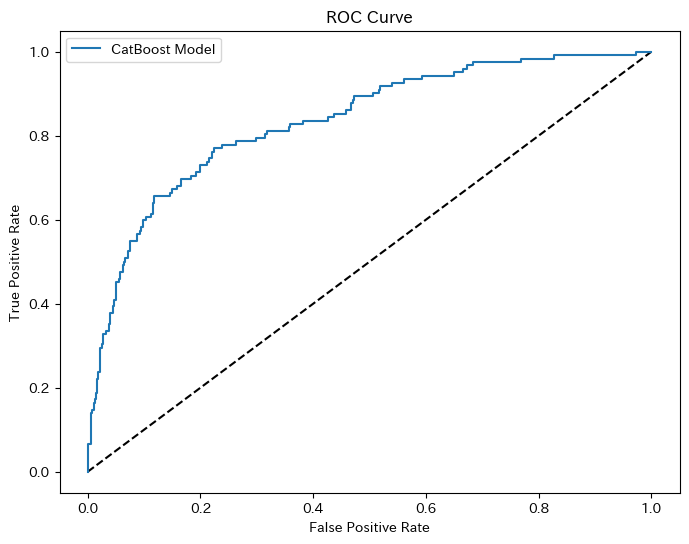

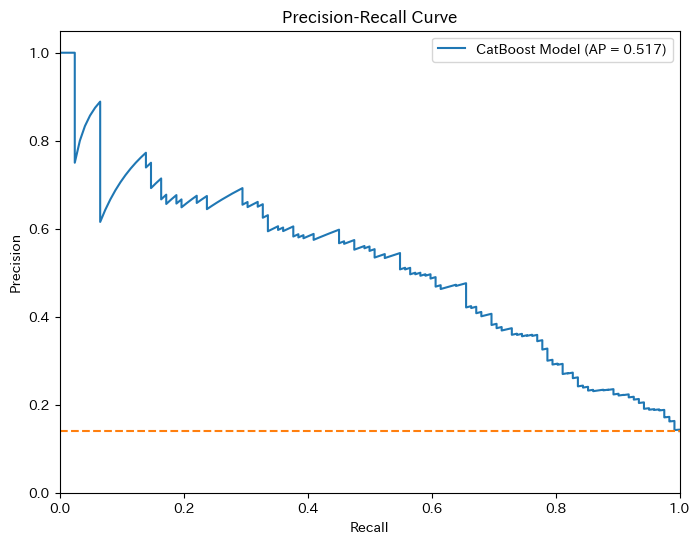

0:	test: 0.7685901	best: 0.7685901 (0)	total: 10.2ms	remaining: 10.2s
100:	test: 0.8242930	best: 0.8257879 (20)	total: 899ms	remaining: 8s
200:	test: 0.8220564	best: 0.8258216 (113)	total: 2.79s	remaining: 11.1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8258216068
bestIteration = 113

Shrink model to first 114 iterations.
このフォールドのAUC: 0.8258


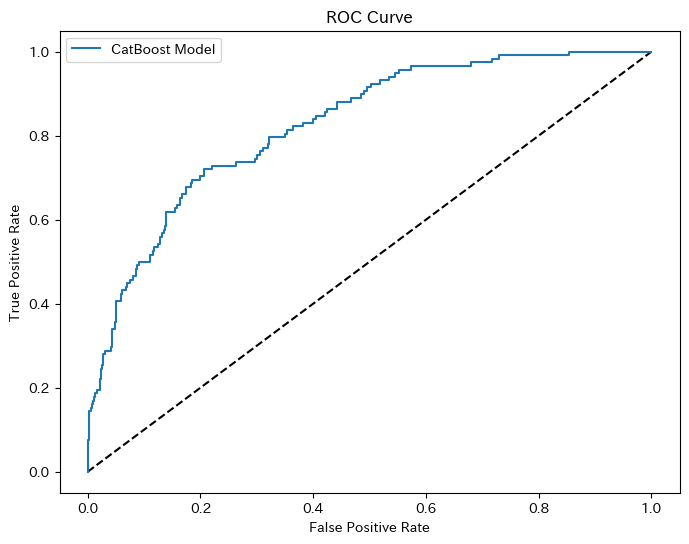

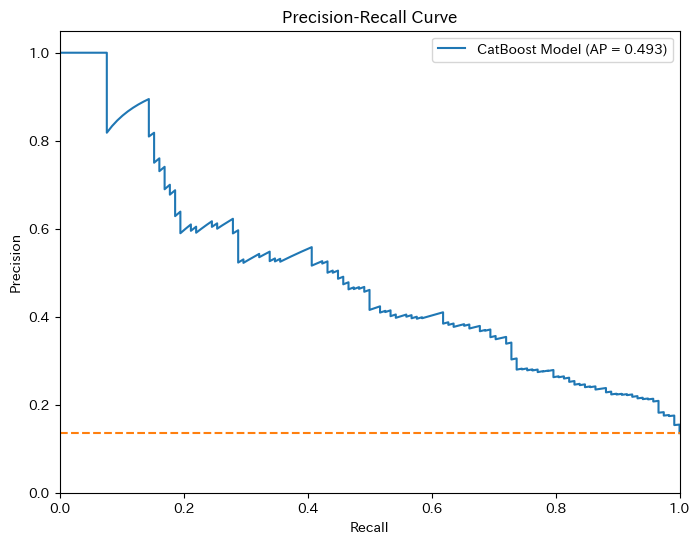

全フォールドの平均AUC: 0.8377


In [ ]:
# 2. モデルの学習と検証結果の可視化
models = train_and_evaluate_models(kfold_data)

**モデルの重みの最適化**  
加重平均（単純平均）と調和平均

In [ ]:
preds = []
for model in models:
    preds.append(model.predict_proba(train_x_processed)[:, 1])  # 各モデルの予測結果を取得

dif = 0.05  # 重みのステップを設定
result = model_optimization.max_score(preds=preds, dif=dif, test_y=train_y_processed)  # test_y はテストデータの正解ラベル

print(f"最適なAUCスコア: {result[0]}")
print(f"最適な重みの組み合わせ: {result[1]}")

最適なAUCスコア: 0.9110559076383435
最適な重みの組み合わせ: [0.0, 0.05, 0.0, 0.04999999999999971]


In [ ]:
preds = []
for model in models:
    preds.append(model.predict_proba(train_x_processed)[:, 1])  # 各モデルの予測結果を取得

dif = 0.05  # 重みのステップを設定
result = model_optimization.max_score_2eval(preds=preds, dif=dif, test_y=train_y_processed)

optimal_score = result[0]  # 最適なスコア（調和平均）
optimal_weights = result[1]  # 最適な重みの組み合わせ

print(f"最適なスコア: {optimal_score}")
print(f"最適な重みの組み合わせ: {optimal_weights}")


最適なスコア: 0.7892895506496284
最適な重みの組み合わせ: [0.0, 0.05, 0.0, 0.04999999999999971]


In [ ]:
test_x_processed

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,Cluster,married,car_possession,offspring,offspring_identified
0,48.0,Self Enquiry,2,13.0,smallbusiness,MALE,1.0,4.0,superdeluxe,3.0,7.0,0,3,avp,496950.0,0,結婚済み,車なし,0,0
1,35.0,Self Enquiry,2,12.0,smallbusiness,FEMALE,1.0,4.0,standard,3.0,4.0,1,3,seniormanager,300000.0,3,結婚済み,車あり,0,0
2,25.0,Self Enquiry,1,9.0,salaried,FEMALE,1.0,4.0,basic,3.0,1.0,0,3,executive,260000.0,2,離婚済み,車あり,0,0
3,21.0,Company Invited,2,7.0,salaried,MALE,1.0,4.0,basic,4.0,1.0,0,3,seniormanager,259875.0,3,離婚済み,車なし,0,0
4,41.0,Company Invited,1,7.0,salaried,MALE,1.0,4.0,basic,3.0,1.0,0,4,executive,268830.0,2,独身,車なし,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,41.0,Company Invited,1,14.0,smallbusiness,FEMALE,1.0,3.0,basic,3.0,2.0,0,4,executive,261840.0,2,結婚済み,車あり,0,0
3485,44.0,Company Invited,1,35.0,salaried,MALE,3.0,5.0,deluxe,3.0,3.0,0,3,manager,349770.0,1,結婚済み,車なし,1,0
3486,24.0,Self Enquiry,2,21.0,smallbusiness,MALE,2.0,3.0,basic,3.0,2.0,0,3,executive,270000.0,2,独身,車あり,0,0
3487,25.0,Self Enquiry,1,9.0,smallbusiness,MALE,2.0,3.0,basic,3.0,2.0,0,3,executive,272430.0,2,結婚済み,車あり,1,0


In [ ]:
categorical_columns

['CityTier',
 'PreferredPropertyStar',
 'PitchSatisfactionScore',
 'TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'Designation',
 'married',
 'car_possession',
 'Cluster']

In [ ]:
from catboost import Pool

# 1. Poolオブジェクトを作成
test_pool = Pool(data=test_x_processed, cat_features=categorical_columns)

# 2. 各モデルでテストデータの予測を取得
test_preds = []
for model in models:
    y_test_pred_probs = model.predict_proba(test_pool)[:, 1]  # テストデータでの予測
    test_preds.append(y_test_pred_probs)

# 3. 最適な重みを使って予測を合算
optimal_weights = result[1]  # max_score関数で得られた最適な重み
final_test_predictions = np.zeros(len(test_preds[0]))

# 各モデルの予測結果に対して、最適な重みを適用して合算
for i, weight in enumerate(optimal_weights):
    final_test_predictions += weight * test_preds[i]

# 4. 結果をCSVファイルに保存
# submit_sample.csvを読み込みます
submit = pd.read_csv(data_dir + "sample_submit.csv", header=None)

# 提出用データフレームに予測結果を代入
submit[1] = final_test_predictions

# CSVファイルに書き出し
submit.to_csv('submission_optimized_with_cluster_github.csv', index=False, header=False)

print("最終的な予測結果が submission_optimized_with_cluster_github.csv に保存されました。")

最終的な予測結果が submission_optimized_with_cluster_github.csv に保存されました。


In [ ]:
submit

,0,1
0,3489,0.007974
1,3490,0.017830
2,3491,0.015887
3,3492,0.015211
4,3493,0.028781
...,...,...
3484,6973,0.011360
3485,6974,0.001256
3486,6975,0.066030
3487,6976,0.019220


<Axes: ylabel='Frequency'>

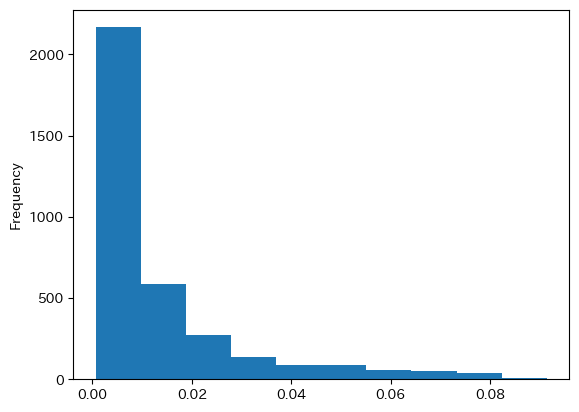

In [ ]:
submit[1].plot(kind='hist')

In [ ]:
submit[1].mean()

0.013214477100122688

In [ ]:
train_y.mean()

0.14244769274863858

# ビジネス応用

## 仮説による施策

プレゼン時間を10分に統一

In [ ]:
simulation_data = train_x_processed.copy()
simulation_data['DurationOfPitch'] = 10

In [ ]:
# 1. Poolオブジェクトを作成
sim_pool = Pool(data=simulation_data, cat_features=categorical_columns)

# 2. 各モデルでテストデータの予測を取得
sim_preds = []
for model in models:
    sim_pred_probs = model.predict_proba(sim_pool)[:, 1]  # テストデータでの予測
    sim_preds.append(sim_pred_probs)

# 3. 最適な重みを使って予測を合算
optimal_weights = result[1]  # max_score関数で得られた最適な重み
final_test_predictions = np.zeros(len(test_preds[0]))

# 各モデルの予測結果に対して、最適な重みを適用して合算
for i, weight in enumerate(optimal_weights):
    final_test_predictions += weight * test_preds[i]

In [ ]:
final_test_predictions

array([0.00797411, 0.01783044, 0.01588741, ..., 0.06603045, 0.01922004,
       0.00100082])

## 施策前

In [ ]:
train_DurationOfPitch = train_x['DurationOfPitch'].apply(preprocessing.convert_to_minutes)

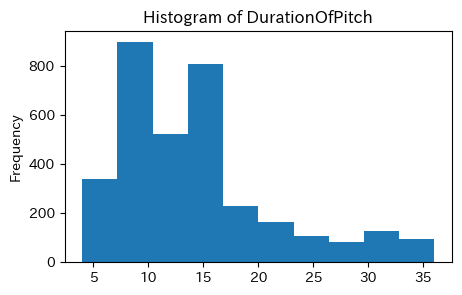

In [ ]:
visualization.HistChart(train_DurationOfPitch)

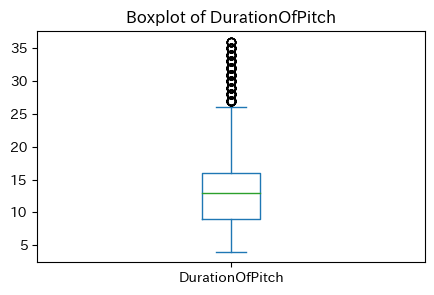

In [ ]:
visualization.BoxChart(train_DurationOfPitch)

In [ ]:
train_y.mean()

0.14244769274863858

## 施策後

In [ ]:
train_DurationOfPitch = train_x['DurationOfPitch'].apply(preprocessing.convert_to_minutes)

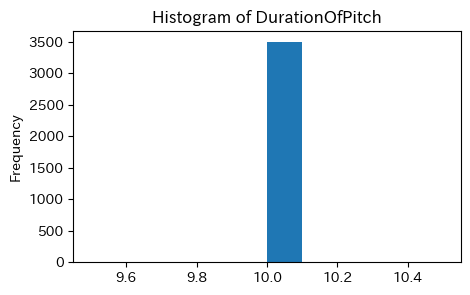

In [ ]:
visualization.HistChart(simulation_data['DurationOfPitch'])

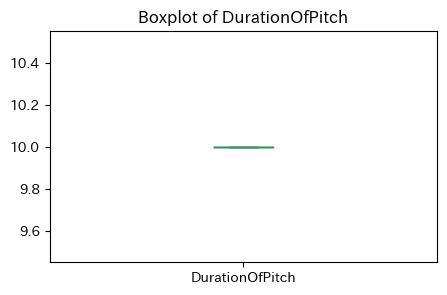

In [ ]:
visualization.BoxChart(simulation_data['DurationOfPitch'])

In [ ]:
final_test_predictions.mean()

0.013214477100122688